<a href="https://colab.research.google.com/github/riddhigarg2605/Network-traffic-analysis-using-ML/blob/main/Network_Traffic_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
from scipy.stats import pearsonr
import seaborn as sns 
from numpy import percentile
import math

In [ ]:
url = 'https://raw.githubusercontent.com/riddhigarg2605/Network-traffic-analysis-using-ML/main/cs448b_ipasn.csv'
nw = pd.read_csv(url)
nw.head()

,date,l_ipn,r_asn,f
0,2006-07-01,0,701,1
1,2006-07-01,0,714,1
2,2006-07-01,0,1239,1
3,2006-07-01,0,1680,1
4,2006-07-01,0,2514,1


In [ ]:
nw.tail()

,date,l_ipn,r_asn,f
20798,2006-09-30,8,36351,3
20799,2006-09-30,8,36856,4
20800,2006-09-30,9,2152,1
20801,2006-09-30,9,8070,1
20802,2006-09-30,9,8075,2


In [ ]:
nw.describe()

,l_ipn,r_asn,f
count,20803.000000,20803.000000,20803.000000
mean,4.228236,12138.320338,93.914243
std,3.278183,9766.324252,5764.995269
min,0.000000,3.000000,1.000000
25%,1.000000,4323.000000,1.000000
50%,4.000000,8764.000000,2.000000
75%,7.000000,17676.000000,8.000000
max,9.000000,40092.000000,784234.000000


In [ ]:
quartiles = percentile(nw.f, [25, 50, 75])
print(quartiles)

[1. 2. 8.]


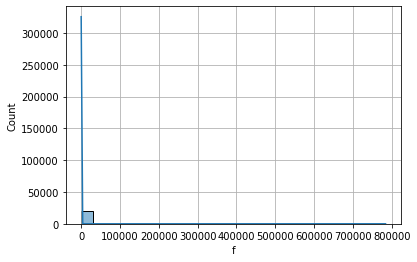

In [ ]:
plt.grid(True)
sns.histplot(nw.f, bins = 25, kde = True)
plt.show()

In [ ]:
nw.nunique()

date       92
l_ipn      10
r_asn    2005
f         707
dtype: int64

In [ ]:
#plt.scatter(network.date, network.l_ipn)

In [ ]:
nw.isnull().sum()

date     0
l_ipn    0
r_asn    0
f        0
dtype: int64

In [ ]:
nw_5k = nw[nw['r_asn'] < 5000]
nw_5k.head

<bound method NDFrame.head of              date  l_ipn  r_asn    f
0      2006-07-01      0    701    1
1      2006-07-01      0    714    1
2      2006-07-01      0   1239    1
3      2006-07-01      0   1680    1
4      2006-07-01      0   2514    1
...           ...    ...    ...  ...
20741  2006-09-30      8   4513   22
20742  2006-09-30      8   4565    1
20743  2006-09-30      8   4713  363
20744  2006-09-30      8   4766    1
20800  2006-09-30      9   2152    1

[6329 rows x 4 columns]>

In [ ]:
#mean and std deviation
nw_5k.describe()

,l_ipn,r_asn,f
count,6329.000000,6329.000000,6329.000000
mean,4.159583,2864.054353,214.966661
std,3.156846,1578.886206,10444.949946
min,0.000000,3.000000,1.000000
25%,1.000000,1668.000000,1.000000
50%,4.000000,3356.000000,2.000000
75%,7.000000,4134.000000,8.000000
max,9.000000,4996.000000,784234.000000


In [ ]:
category = []

for row in nw_5k['f']:
   if row < 8 : category.append('0')
   else:  category.append('1')

nw_5k['category'] = category

#nw_5k.loc[(nw_5k.f == '')] 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
nw_5k.head

<bound method NDFrame.head of              date  l_ipn  r_asn    f category
0      2006-07-01      0    701    1        0
1      2006-07-01      0    714    1        0
2      2006-07-01      0   1239    1        0
3      2006-07-01      0   1680    1        0
4      2006-07-01      0   2514    1        0
...           ...    ...    ...  ...      ...
20741  2006-09-30      8   4513   22        1
20742  2006-09-30      8   4565    1        0
20743  2006-09-30      8   4713  363        1
20744  2006-09-30      8   4766    1        0
20800  2006-09-30      9   2152    1        0

[6329 rows x 5 columns]>

In [ ]:
nw_10k = nw[(nw['r_asn'] > 5000) & (nw['r_asn'] < 10000)]
nw_10k.head

<bound method NDFrame.head of              date  l_ipn  r_asn   f
8      2006-07-01      0   5617   2
9      2006-07-01      0   6478   1
10     2006-07-01      0   6713   1
11     2006-07-01      0   7132   1
12     2006-07-01      0   9105   1
...           ...    ...    ...  ..
20756  2006-09-30      8   8075   2
20757  2006-09-30      8   8151  46
20758  2006-09-30      8   8220  22
20801  2006-09-30      9   8070   1
20802  2006-09-30      9   8075   2

[5134 rows x 4 columns]>

In [ ]:
nw_10k.describe()

,l_ipn,r_asn,f
count,5134.000000,5134.000000,5134.000000
mean,3.916050,7586.935138,36.638878
std,3.255974,1257.706031,229.985078
min,0.000000,5006.000000,1.000000
25%,1.000000,6478.000000,1.000000
50%,3.000000,7377.000000,2.000000
75%,7.000000,8402.000000,6.000000
max,9.000000,9976.000000,5214.000000


In [ ]:
category = []

for row in nw_10k['f']:
   if row < 6 : category.append('0')
   else:  category.append('1')

nw_10k['category'] = category
nw_10k.head

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


<bound method NDFrame.head of              date  l_ipn  r_asn   f category
8      2006-07-01      0   5617   2        0
9      2006-07-01      0   6478   1        0
10     2006-07-01      0   6713   1        0
11     2006-07-01      0   7132   1        0
12     2006-07-01      0   9105   1        0
...           ...    ...    ...  ..      ...
20756  2006-09-30      8   8075   2        0
20757  2006-09-30      8   8151  46        1
20758  2006-09-30      8   8220  22        1
20801  2006-09-30      9   8070   1        0
20802  2006-09-30      9   8075   2        0

[5134 rows x 5 columns]>

In [ ]:
# new['category'] = [i*0 if i > 1000 else i == 1 for i in new.f]

In [ ]:
#new.loc[new.f > 5000, 'category'] = '0'
#new.loc[new.f < 5000, 'category'] = '1'


In [ ]:
nw_20k = nw[(nw['r_asn'] > 10000) & (nw['r_asn'] < 20000)]
nw_20k.head
nw_20k.describe()

,l_ipn,r_asn,f
count,5147.000000,5147.000000,5147.000000
mean,4.465320,14696.764329,44.076549
std,3.428934,2772.057066,234.937257
min,0.000000,10013.000000,1.000000
25%,1.000000,12182.000000,1.000000
50%,5.000000,14742.000000,2.000000
75%,8.000000,17184.000000,10.000000
max,9.000000,19945.000000,7902.000000


In [ ]:
category = []

for row in nw_20k['f']:
   if row < 10 : category.append('0')
   else:  category.append('1')

nw_20k['category'] = category
nw_20k.head

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


<bound method NDFrame.head of              date  l_ipn  r_asn  f category
13     2006-07-01      0  10738  1        0
14     2006-07-01      0  10994  1        0
15     2006-07-01      0  12334  1        0
16     2006-07-01      0  12524  1        0
17     2006-07-01      0  12542  1        0
...           ...    ...    ... ..      ...
20773  2006-09-30      8  15270  2        0
20774  2006-09-30      8  16805  1        0
20775  2006-09-30      8  17225  1        0
20776  2006-09-30      8  18588  4        0
20777  2006-09-30      8  19024  1        0

[5147 rows x 5 columns]>

In [ ]:
nw_30k = nw[(nw['r_asn'] > 20000) & (nw['r_asn'] < 30000)]
nw_30k.head
nw_30k.describe()

,l_ipn,r_asn,f
count,2407.000000,2407.000000,2407.000000
mean,4.520150,24985.235978,24.255089
std,3.286966,3044.404817,157.109081
min,0.000000,20001.000000,1.000000
25%,1.000000,22205.000000,1.000000
50%,5.000000,25074.000000,2.000000
75%,8.000000,27357.000000,6.000000
max,9.000000,29975.000000,3416.000000


In [ ]:
category = []
 
for row in nw_30k['f']:
   if row < 6 : category.append('0')
   else:  category.append('1')
 
nw_30k['category'] = category
nw_30k.head

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


<bound method NDFrame.head of              date  l_ipn  r_asn  f category
28     2006-07-01      0  20258  1        0
29     2006-07-01      0  20299  1        0
30     2006-07-01      0  20685  1        0
31     2006-07-01      0  21003  1        0
32     2006-07-01      0  24915  2        0
...           ...    ...    ... ..      ...
20785  2006-09-30      8  25108  2        0
20786  2006-09-30      8  26201  1        0
20787  2006-09-30      8  26347  3        0
20788  2006-09-30      8  29668  1        0
20789  2006-09-30      8  29873  3        0

[2407 rows x 5 columns]>

In [ ]:
nw_30max = nw[nw['r_asn'] > 30000]
nw_30max.head
nw_30max.describe()

,l_ipn,r_asn,f
count,1786.000000,1786.00000,1786.000000
mean,4.292273,33399.68869,67.091825
std,3.222595,2289.32136,368.258831
min,0.000000,30015.00000,1.000000
25%,2.000000,31976.00000,1.000000
50%,4.000000,33322.00000,4.000000
75%,8.000000,35216.00000,13.000000
max,9.000000,40092.00000,5059.000000


In [ ]:
category = []

for row in nw_30max['f']:
   if row < 13 : category.append('0')
   else:  category.append('1')

nw_30max['category'] = category
nw_30max.head

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


<bound method NDFrame.head of              date  l_ipn  r_asn    f category
34     2006-07-01      0  32636    1        0
66     2006-07-01      2  33260    8        0
67     2006-07-01      2  33650  174        1
68     2006-07-01      2  36114    1        0
88     2006-07-01      4  31976   83        1
...           ...    ...    ...  ...      ...
20795  2006-09-30      8  33176    3        0
20796  2006-09-30      8  33322    1        0
20797  2006-09-30      8  35845    1        0
20798  2006-09-30      8  36351    3        0
20799  2006-09-30      8  36856    4        0

[1786 rows x 5 columns]>

In [ ]:
network1 =nw_5k.append(nw_10k)
network2 =network1.append(nw_20k)
network3 =network2.append(nw_30k)
network =network3.append(nw_30max)
network.head

<bound method NDFrame.head of              date  l_ipn  r_asn  f category
0      2006-07-01      0    701  1        0
1      2006-07-01      0    714  1        0
2      2006-07-01      0   1239  1        0
3      2006-07-01      0   1680  1        0
4      2006-07-01      0   2514  1        0
...           ...    ...    ... ..      ...
20795  2006-09-30      8  33176  3        0
20796  2006-09-30      8  33322  1        0
20797  2006-09-30      8  35845  1        0
20798  2006-09-30      8  36351  3        0
20799  2006-09-30      8  36856  4        0

[20803 rows x 5 columns]>

In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
network.to_csv('network.csv')
!cp network.csv "drive/My Drive/"

In [ ]:
network.isnull().sum()

date        0
l_ipn       0
r_asn       0
f           0
category    0
dtype: int64

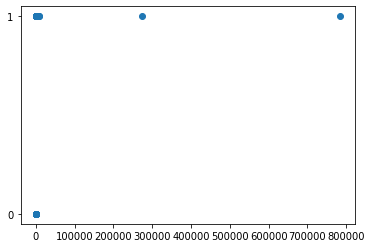

In [ ]:
plt.scatter(network.f, network.category)

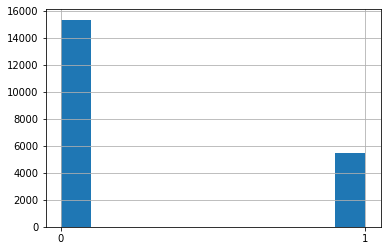

In [ ]:
network['category'].hist()

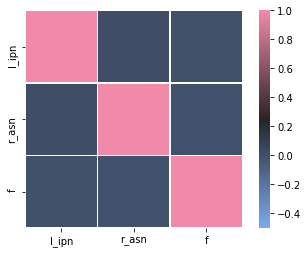

In [ ]:
from scipy.stats import pearsonr
corr = network.iloc[:,:-1].corr(method = 'pearson')
cmap = sns.diverging_palette(250,354,80,69, center = 'dark', as_cmap = True)
sns.heatmap(corr, vmax =1, vmin =-.5, cmap = cmap, square = True, linewidths = .2)

In [ ]:
#from scipy.stats import pearsonr
#from scipy import stats
#from scipy.stats import pointbiserialr
#ff= network['f'].to_list()
#cat = network['category'].to_list()
#network['f']=network['f'].astype(int)
#network['category']=network['category'].astype(int)

#stats.pearsonr(network['f'],network['category'])
#network.head()
#network.corr(method ='kendall')

In [ ]:
#plt.scatter(network.r_asn, network.category)

In [ ]:
#plt.scatter(network.l_ipn, network.r_asn)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(network[['f']],network.category,test_size=0.3)
X_test

,f
13781,1
8341,2
4686,17
10568,1
20117,1
...,...
17491,1
4412,3
12362,4
17156,7


#**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model.predict(X_test)

array(['0', '0', '1', ..., '0', '0', '0'], dtype=object)

In [ ]:
model.score(X_test,Y_test)

0.9695561608716552

In [ ]:
model.predict_proba(X_test)

array([[9.98582974e-01, 1.41702553e-03],
       [9.96306986e-01, 3.69301442e-03],
       [1.49979663e-04, 9.99850020e-01],
       ...,
       [9.75332278e-01, 2.46677220e-02],
       [6.89286978e-01, 3.10713022e-01],
       [9.90410469e-01, 9.58953085e-03]])

In [ ]:
from sklearn.model_selection import train_test_split
#X_train, X_test, Y_train, Y_test = train_test_split(network[['r_asn']],network.category,test_size=0.1)
#X_test
#from sklearn.linear_model import LogisticRegression
#model = LogisticRegression()
#model.fit(X_train,Y_train)
#model.predict(X_test)

In [ ]:
model.score(X_test,Y_test)

0.9695561608716552

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(network[['l_ipn']],network.category,test_size=0.1)
X_test
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)
model.predict(X_test)
model.score(X_test,Y_test)

0.7385872176838059

In [148]:
X = network.drop(["category",'date','r_asn'], axis =1)
y = network['category']

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [154]:
predictions=logmodel.predict(X_test)
logmodel.score(X_test,y_test)

0.9663515462265663

In [ ]:
from sklearn.metrics import classification_report
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.97      0.98      0.98      4627\n           1       0.95      0.92      0.93      1614\n\n    accuracy                           0.97      6241\n   macro avg       0.96      0.95      0.96      6241\nweighted avg       0.97      0.97      0.97      6241\n'

In [155]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[4480,   98],
       [ 112, 1551]])

# **Naive Bayes Classifier**

In [157]:
X= network.drop(["category",'date','r_asn'], axis =1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [ ]:
len(X_train)

14562

In [ ]:
len(X_test)

6241

In [158]:
from sklearn.naive_bayes import GaussianNB
gmodel = GaussianNB()
gmodel.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [159]:
gmodel.score(X_test, y_test)

0.9581797788815895

In [160]:
g = gmodel.predict_proba(X_test[:10]).astype(float)
g = np.around(g)
print(g)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


#**Neural Network**

In [ ]:
pip install keras

In [ ]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving networkmehh.csv to networkmehh.csv


In [ ]:
import io
nwk = pd.read_csv(io.BytesIO(uploaded['networkmehh.csv']))
nwk.head

<bound method NDFrame.head of        Unnamed: 0  l_ipn  r_asn  f  category
0               0      0    701  1         0
1               1      0    714  1         0
2               2      0   1239  1         0
3               3      0   1680  1         0
4               4      0   2514  1         0
...           ...    ...    ... ..       ...
20798       20795      8  33176  3         0
20799       20796      8  33322  1         0
20800       20797      8  35845  1         0
20801       20798      8  36351  3         0
20802       20799      8  36856  4         0

[20803 rows x 5 columns]>

In [162]:
X = nwk.drop(["category",'r_asn'], axis =1)
y = nwk['category']

In [170]:
#input dim =3
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=3, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [171]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [172]:
# fit the keras model on the dataset
neural = model.fit(X, y, epochs=150, batch_size=10)

Epoch 1/150
2081/2081 [==============================] - 3s 1ms/step - loss: 27.5563 - accuracy: 0.6898
Epoch 2/150
2081/2081 [==============================] - 2s 1ms/step - loss: 22.2557 - accuracy: 0.7411
Epoch 3/150
2081/2081 [==============================] - 2s 1ms/step - loss: 3.0960 - accuracy: 0.7431
Epoch 4/150
2081/2081 [==============================] - 2s 1ms/step - loss: 0.5782 - accuracy: 0.7351
Epoch 5/150
2081/2081 [==============================] - 2s 1ms/step - loss: 0.5756 - accuracy: 0.7376
Epoch 6/150
2081/2081 [==============================] - 2s 1ms/step - loss: 0.5716 - accuracy: 0.7414
Epoch 7/150
2081/2081 [==============================] - 2s 1ms/step - loss: 0.5799 - accuracy: 0.7334
Epoch 8/150
2081/2081 [==============================] - 2s 1ms/step - loss: 0.5771 - accuracy: 0.7362
Epoch 9/150
2081/2081 [==============================] - 2s 1ms/step - loss: 0.5728 - accuracy: 0.7403
Epoch 10/150
2081/2081 [==============================] - 2s 1ms/step -

In [73]:
# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))


651/651 [==============================] - 1s 921us/step - loss: 0.5749 - accuracy: 0.7382
Accuracy: 73.82


In [74]:
model = Sequential()
model.add(Dense(12, input_dim=4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [75]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#neural2 = model.fit(X, y, validation_data=(X_test, y_test), epochs=150, batch_size=10)